Regression Example with TF

In [1]:
import pandas as pd, tensorflow as tf, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
rng=np.random.RandomState(42)
n=600
x=pd.DataFrame(
{
#Random numbers from a normal distribution with mean 1200 and std dev 300. Values clipped between 400–3000 (so no weird extremes).
"Size_sqft":rng.normal(1200,300,n).clip(400,3000),
"Rooms":rng.randint(1,6,n),
"Age":rng.randint(0,30,n)})

#random noise (variation) with mean = 0 and std = 2000.
noise=rng.normal(0,2000, n)

# each square foot adds RM 80,
# Each extra room adds RM 1500
# Older houses lose RM 1200 in value per year
# 5k = Base Price
# Noise = Random variation (to simulate real-world unpredictability)
y=80*x["Size_sqft"] +1500*x["Rooms"]-1200*x["Age"]+5000+noise

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
#standardize data (mean=0 , Standard Deviation=1)
scalar=StandardScaler()

#fit -> learns the mean and standard deviation from the data (X_train)
#transform -> uses those values to scale the data.
x_train_tr=scalar.fit_transform(x_train)

#x_test cannot use fit because it will recalculate a new mean and new std using the test data. test only using transform
x_test_tr=scalar.transform(x_test)

In [5]:
tf.random.set_seed(42)
#activation = sigmoid
#input -> hidden -> output
model=tf.keras.Sequential([
   tf.keras.layers.Input(shape=(x_train_tr.shape[1],)), #The extra 1 → adds another dimension, making the input 3D.
   tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dense(32, activation="relu"),
   tf.keras.layers.Dense(1)
])

In [6]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.mse,
              metrics=["mae"]
)

In [7]:
history = model.fit(x_train_tr,y_train,epochs=100, verbose=0,validation_data=(x_test_tr,y_test))

In [8]:
loss, mae=model.evaluate(x_test_tr,y_test,verbose=0)
print(f"MAE:{mae}")

MAE:62011.59765625


In [9]:
y_pred = model.predict(x_test_tr)

print(y_test.shape)
print(y_pred.shape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
(120,)
(120, 1)


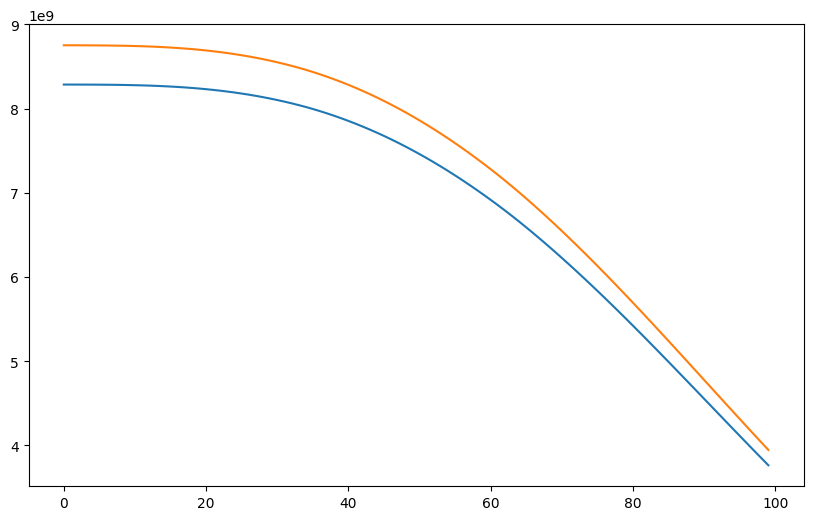

In [10]:
plt.figure(figsize=(10,6))
plt.plot(history.history ["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

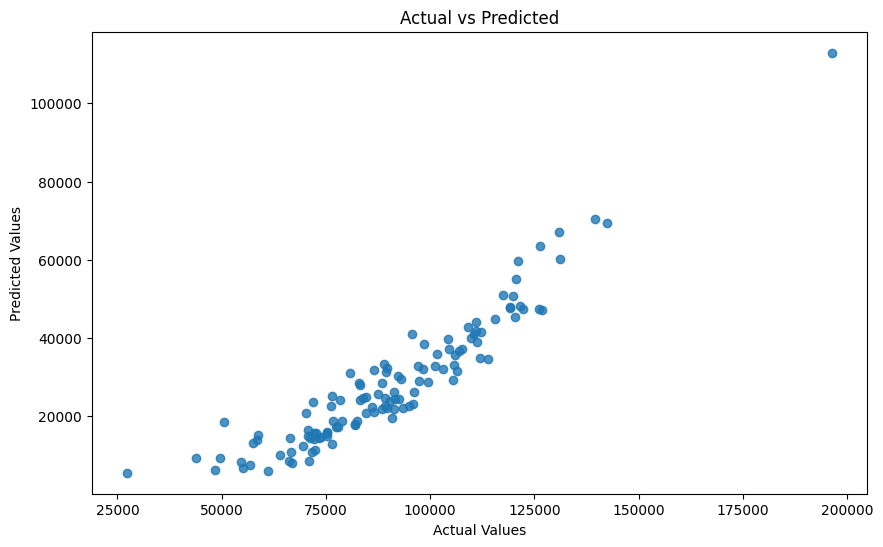

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()